### Linear Programming Problems
Linear programming problems are type of problems where both of our constraint and objective function equations are linear in nature. There are multiple ways to solve a linear programming problem, we can either use graphical method or use algebric methods to solve these problems. 
<br>We will not be covering graphical methods here. But an essential thing to remember is that the solution of a linear programming problem when solved graphically the solution resides in ***VERTICES OF THE GRAPH***. Also, graphical methods can be used for equations in 2 variables (at max 3) otherwise plotting those points might not be possible. 
<br>An example of the LPP can be taken as:
<br>Z = 4x + 6y $\to$ this is our objective function we need to either maximize or minimize this
<br>-x+y $\leq$ 11
<br> x+y $\leq$ 27
<br> 2x + 5y $\leq$ 90
<br>Each one of these are constraint equations. 

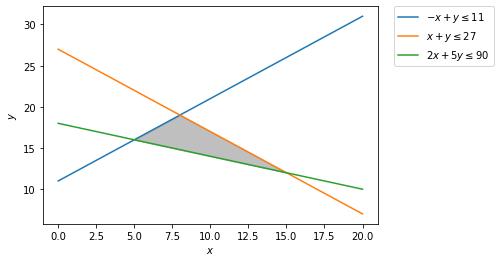

In [36]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,20,10000) 
y1 = 11.0 + x
y2 = 27.0 - x
y3 = (90-2*x)/5.0
plt.plot(x,y1,label = r'$-x+y\leq11$')
plt.plot(x,y2,label = r'$x+y\leq27$')
plt.plot(x,y3,label = r'$2x+5y\leq90$')
#plt.xlim((0, 20))
#plt.ylim((0, 40))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
y5 = np.minimum(y1, y2)
plt.fill_between(x, y3, y5, where=y3<y5, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Now, we know for a linear programming problem the solution resides at one of the vertex. We can compute the z value for the solution of each of the vertex and check which is the maximum. 
However, there is one rule of thumb:
- If the problem is a maximization point furthest away from the origin is the maximum
- If the problem is for minimization point closest to the origin is the minimum

<br>This rule will undergo change if the feasible region has origin inside or the plot is on the negative side. 
<br>Also, this solution can be applied only in the case when there are two variables more than that god help us in plotting the function. 

In [41]:
import sympy as sp
x,y = sp.symbols('x y')
eqn = [y-x-11,x+y-27]
print(sp.solve(eqn,[x,y]))
eqn = [y-x-11,2*x+5*y-90]
print(sp.solve(eqn,[x,y]))
eqn = [y+x-27,2*x+5*y-90]
print(sp.solve(eqn,[x,y]))

{x: 8, y: 19}
{x: 5, y: 16}
{x: 15, y: 12}


You can check 15,12 will give us the maximum value of the objective function and therefore that is our answer for X,Y and corresponding objective function. 

#### Simplex Algorithm 
Simplex algorithm was developed in 1947, the original idea of the algorithm was to use steepest descent by George Bernard Dantzig towards the optimal solution. However, the original idea was to move along the edges. Which from the above example is evident would have been very inefficient because of $\infty$ points. Thus this idea was immediately rejected. 
<br>Therefore he started working towards vertex to vertex optimization and therefore the simplex algorithm was born. 
<br>Enough of history let us go to the evaluation of the algorithm:
<br>Optimize - <center>$c_1x_1$ + $c_2x_2$ + $c_3x_3$ ... + $c_nx_n$</center>
<br>Subject to constraints:
<br> <center>$a_{11}x_1 + a_{12}x_2 + a_{13}x_3 + ... + a_{1n}x_n \leq b_1$</center>
<br> <center>$a_{21}x_1 + a_{22}x_2 + a_{23}x_3 + ... + a_{2n}x_n \leq b_1$</center>
<br><center>.</center>
<br><center>.</center>
<br><center>.</center>
<br> <center>$a_{m1}x_1 + a_{m2}x_2 + a_{m3}x_3 + ... + a_{mn}x_n \leq b_1$</center>

**STEPS FOR SIMPLEX ALGORITHM**
There are some set of defined set of steps to solve a linear programming problem using simplex problem. There can be set into different format based on how we set the simplex problem (the end result is not going to vary). The steps of the simplex algorithm is:
- Set the problem in standard (correct) format
    - Set the objective function as maximum problem (if you have minimum problem multiply the objective function by -1
    - Set all the constraints as $\leq$ format (if there is a $\geq$ constraint multiply constraint by -1
    - All the variables should be positive
- Add requisite slack variables (these variables are added to make $\geq$ constraint into = type
- Create the initial simplex tableau
- Identify the Original Basis Solution corresponding to the basis variables
- Find the maximum -ve value in the last row (this will become our Pivot Column) - this will be entering variable
- Find the minimum-non-negative ratio of RHS with the Pivot Column (this becomes exiting basis variable
- Use Gauss-Jordan elimination to make other elements (apart from entering variable) as Zero
- Find the next maximum -ve value in the last row
- Stop when there are no -ve values in the last row

<br>This will become clear using an example. Let us solve the same problem we solved using graphical method.

*EXAMPLE 1:*
<br> Maximize 4$x_1$+6$x_2$
<br> Subject to constraint:
<br> -$x_1 + x_2 \leq 11$
<br> $x_1 + x_2 \leq 27$
<br> $2x_1 + 5x_2 \leq 90$
<br> $x_1$,$x_2$ $\geq $ 0

**Implementation of Simplex Algorithm - Solution by Hand**
<br>*SOLUTION*
<br>**STEP 1**: Set the problem in standard form
<br>For setting in standard form we need to do two things:
- Make the Objective function in Maximization form (Here we have the objective function already in the maximization form so we don't need to do anything
- Convert all constraints in $\leq$ format here again all the constraints are already in $\leq$ format so we don't need to do anything

<br>Our Problem in standard form becomes:
<br> Maximize <center>4$x_1$ + 6$x_2$</center>
<br> Subject to constraint:
<br> <center>-$x_1 + x_2 \leq 11$</center>
<br> <center>$x_1 + x_2 \leq 27$</center>
<br> <center>$2x_1 + 5x_2 \leq 90$</center>
<br> <center>$x_1$,$x_2$ $\geq $ 0</center>

**STEP 2**: Addition of Slack Variables
<br> Maximize <center>4$x_1$ + 6$x_2$</center>
<br><br> <center>-$x_1 + x_2 + s_1 = 11$</center>
<br> <center>$x_1 + x_2      + s_2 = 27$</center>
<br> <center>$2x_1 + 5x_2    + s_3 = 90$</center>

**STEP 3**: Setting up of Simplex Tableau
<img src="Images/Step 1.jpeg" width="800">

<br>Following are the elements of this table:
- Top row is the coefficients of the variables in Objective Function
- Second row is the names of all variables (including the slack variables)
- Third row is the coefficients of variables in $1{st}$ constraint
- Fourth row is the coefficients of variables in $1{nd}$ constraint
- Fifth row is the coefficients of variables in $3{rd}$ constraint
- Sixth row is the Negative Values of coefficient of respective variables in objective function

<br>If we set $x_1$, $x_2$ & $x_3$ as Zero we can get values of $s_1 = 11$, $s_2 = 27$ & $s_3 = 90$ and corresponding value of the objective function is Zero because all variables determining objective function ($x_1$ & $x_2$) are Zero. 

<br>This is called the Initial Basic Feasible Solution $(x_1,x_2,s_1,s_2,s_3) = (0,0,11,27,90)$

**STEP 4**: Choosing the maximum Negative Value from the last row and determine entering and exiting variable
<img src="Images/Step 2.jpeg" width="800">
<br>Here we have -6 as the most negative value $\to$ $x_2$ becomes the entering variable and RHS/1 is minimum for 11 so $s_1$ becomes the exiting variable. Now we will perform Gaussian Elimination to alter the rows.

**STEP 5**: Gaussian Elimination to make the pivot element 1 and remaining elements in pivot column as Zero
<img src="Images/Step 3.jpeg" width="800">

**STEP 6**: Continue with the same steps if there is a negative value in the last row.
<img src="Images/Step 4.jpeg" width="800">
<img src="Images/Step 5.jpeg" width="800">

There is still a negative value in the bottom row we need to repeat the step. (Gaussian Elimination and Pivot Element Identification)
<img src="Images/Step 6.jpeg" width="800">

As we can see in the last table, all the values in bottom row are Non-Negative. 
<br>Also, the variables which have entered the table (and not left) are listed in first column $x_2, s_1$ and $x_1$.
<br>These become the basis variable and we can equate each one of them equal to RHS and remaining values are Zero. 
<br>This is also the solution we found in our Graphical Method, last value 132 is the maximum value the function can take. 
<br>Final solution becomes ($x_1$,$x_2$,$s_1$,$s_2$,$s_3$) = (15,12,14,0,0)

*NOTE 1*: Ignore the side calculations that is rough work
<br>*NOTE 2*: I would have solved more questions, but it is difficult to write so much in proper handwriting !!! 

<br>We will solve some questions using the ```scipy``` package (It won't give individual steps) but will solve the problem for us quickly. 
<br>Just remember standard format of solution in Simplex was maximize. However, in ```scipy``` standard format is **MINIMIZE**
<br>Our Objective Function $4x_1$ + $6x_2$ $\to$ -$4x_1$ + -$6x_2$ for ```SCIPY STANDARDIZATION```
<br>Remaining standardizations are same as Simplex so no change required for our constraints.

In [2]:
import numpy as np
from scipy.optimize import linprog
obj = [-4,-6] #These are coefficients of our objective function
lhs = [[-1,1],[1,1],[2,5]] #LHS Inequalities
rhs = [11,27,90]
#lhs_eq = [[x1,x2],[y1,y2]] This will be required if there is an equality constraint not required here
#rhs_eq = [[a1,a2]] This will be required if there is an equality constraint RHS value of the same
bnd = [(0,float('inf')),(0,float('inf'))] #This is boundary of our decision variables used because positive

In [4]:
#optimization = linprog(c = obj,
#                       A_ub = lhs,
#                      b_ub = rhs,
#                      bounds = bnd,
#                      A_eq = lhs_eq,
#                      b_eq = rhs_eq
#                      method = 'simplex')

#If we had equality constraints we would've used the A_eq and b_eq variables. 

optimization = linprog(c = obj,
                       A_ub = lhs,
                      b_ub = rhs,
                      bounds = bnd,
                      method = 'simplex')

In [6]:
optimization

     con: array([], dtype=float64)
     fun: -132.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([14.,  0.,  0.])
  status: 0
 success: True
       x: array([15., 12.])

As we can see we got the same solution as the above two methods (SURPRISE SURPRISE) we should not have expected otherwise. This completes the simplex method.

---

**CLASS EXERCISE**:
<br> Objective: Maximize: 5$x_1$ - 3$x_2$ - 4$x_3$ + 7$x_4$
<br>Subject to:
<br>$x_1 + x_2 + x_3 + x_4 \leq 14$
<br>$x_1 + x_3 \leq 7$
<br>$2x_1 + x_2 + x_3 \leq 13$
<br>$x_1$, $x_2$ ... $x_4$ $\geq$ 0

<br>This being a maximization problem we will convert it to minimization to use in ```scipy```. 
<br>Objective: Maximize: 5$x_1$ - 3$x_2$ - 4$x_3$ + 7$x_4$ $\to$ Minimize: -5$x_1$ + 3$x_2$ + 4$x_3$ - 7$x_4$
<br>Constraints are all ok

In [8]:
import numpy as np
from scipy.optimize import linprog
obj = [-5,3,4,-7]
lhs = [[1,1,1,1],
      [1,0,1,0],
      [2,1,1,0]]
rhs = [14,7,13]
bnd = [(0,float('inf')),(0,float('inf')),(0,float('inf')),(0,float('inf'))] #There are 4 bounds because 4 variables

optimize = linprog(c = obj,
                  A_ub = lhs,
                  b_ub = rhs,
                  bounds = bnd,
                  method = 'simplex')
optimize

     con: array([], dtype=float64)
     fun: -98.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([ 0.,  7., 13.])
  status: 0
 success: True
       x: array([ 0.,  0.,  0., 14.])

This gives the optimal basis as ($x_1$,$x_2$,$x_3$,$x_4$) = $(0,0,0,14)$

In [1]:
import numpy as np
from scipy.optimize import linprog
A = np.array([[1,2,2,1,0],[3,4,1,0,1]])
b = np.array([8,7])
c = np.array([-5,-2,-3,1,-1])
res = linprog(c,A_ub = A,b_ub = b,bounds=(0,None))
print("Optimal Value", res.fun,"\n",np.array([res.x]).T)

Optimal Value -16.19999999998804 
 [[1.20000000e+00]
 [4.30630311e-13]
 [3.40000000e+00]
 [2.02115516e-12]
 [2.22165400e-11]]


In [8]:
import numpy as np
from scipy.optimize import linprog
A = np.array([[-1,-1],
             [2,3],
             [-1,0],
             [0,-1]])
b = np.array([-2,12,0,0])
c = np.array([2,3])
res = linprog(c,A_ub = A, b_ub = b,bounds=(0,None))
print("Optimal Solution:", res.fun, "\n", np.array([res.x]).T)

Optimal Solution: 3.9999999999969558 
 [[2.00000000e+00]
 [6.25054235e-14]]
